In [1]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import threading
import cv2
import numpy as np

In [2]:
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import clear_output, display

In [3]:
def compute_angle(A, B, C):
    # Vector BA
    BA = [A.x - B.x, A.y - B.y, A.z - B.z]
    # Vector BC
    BC = [C.x - B.x, C.y - B.y, C.z - B.z]

    # Dot product
    dot_product = sum(a*b for a, b in zip(BA, BC))

    # Magnitude of vectors
    mag_BA = math.sqrt(sum(a*a for a in BA))
    mag_BC = math.sqrt(sum(b*b for b in BC))

    # Cosine of the angle
    cos_theta = dot_product / (mag_BA * mag_BC)

    # Angle in radians
    theta = math.acos(cos_theta)

    # Convert to degrees
    theta_deg = math.degrees(theta)

    return theta_deg

In [4]:
model_path = './PoseLandmarkerLite.task'

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


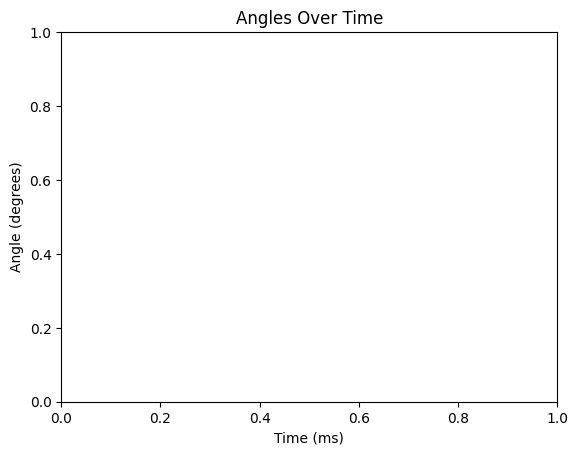

In [5]:
BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
VisionRunningMode = mp.tasks.vision.RunningMode

options = PoseLandmarkerOptions(
    base_options=BaseOptions(model_asset_path=model_path),
    running_mode=VisionRunningMode.VIDEO)

landmarker = PoseLandmarker.create_from_options(options)

fig, ax = plt.subplots()
ax.set_title("Angles Over Time")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Angle (degrees)")

angles = []
timestamps = []
#The given data is from Sahith Side View Good --> the left arm 
given_angles = [114.74538300788973, 117.87354131393268, 109.44801583256293, 106.33907142033826, 109.3288326193811, 108.20338800895296, 107.67121968767415, 102.63815048487244, 92.16937266416433, 93.98689593768052, 94.84936955223192, 96.190899788242, 72.9514699044119, 76.05418197315846, 61.439278313691446, 62.61314394018578, 61.54498723013727, 66.89628787750902, 75.7281054143447, 74.46288497832458, 78.04109115465829, 93.34637472934598, 91.7873264035118, 86.14573313025278, 80.7764705735586, 76.25133818535964, 72.82622597680664, 60.129104967734584, 56.158259291324036, 55.16649718585729, 65.85258465702819, 74.84198033674384, 80.69925047968322, 91.29890429065968, 99.68039523612414, 97.98265379928377, 102.86868124771063, 103.89961880606135, 99.73477702175143, 100.65468135274013, 102.66254045252373, 102.05307277241856, 117.10695727065075, 121.74653203621642, 106.50782583168692, 117.41560543412159, 114.27518763478966, 123.158884967349, 126.30909166078871, 118.13339602956644, 102.72016009366838, 111.09619752140864, 104.32549728094884, 118.90704730881254, 100.34579066160802, 118.43159334234689, 108.04447849754294, 126.97556351659124, 120.5263080193883, 115.97861215967437, 112.242117195287, 99.4847268994012, 102.24942229577782, 104.21431889006726, 111.82080929907868, 93.28180040326987, 95.28010577460276, 91.87566565677486, 99.99348624180502, 100.29516847761253, 89.49288943071366, 88.09067306578706, 85.35738382944072, 72.63920440098369, 62.546424932884456, 65.09051243538377, 56.21921495628278, 53.27210304464615, 59.16103024069424, 70.26513182652106, 95.35403606427577, 88.53617001460661, 129.2516015490133, 92.95377918019203, 84.08951995559539, 133.2433226650712, 124.33576648057121, 143.88761456111976, 129.00012758762003, 63.349984364279806, 47.92774559940065, 71.06438831254704, 88.02884587315233, 79.75611266318025, 83.77958498210411, 84.86361288560951, 99.06461224528103, 94.3515100253674, 111.76495999582771, 96.52101349389301, 103.20168482067771, 100.16655833878346, 107.60508775319288, 100.77907129457107, 118.48319861748654, 116.38678390872711, 134.08937187573034, 124.37589790395779, 125.64269334372223, 126.81963654659266, 130.12135010288637, 125.97139112828465, 133.0995922904305, 122.97604246549162, 124.75757609809207, 135.85360961698018, 125.9536254670221, 121.47483302505574, 127.59337548326423, 109.58333134391715, 119.17075779050847, 125.97833823815579, 118.04118232725287, 127.19103909358712, 102.38662583048108, 99.58884241229443, 99.18565111613091, 99.28940436092812, 97.88555618037604, 101.16908705898703, 106.1014376642317, 88.20440350813575, 81.00301819256492, 64.93165138091202, 61.377535642454625, 66.46988610284005, 67.33973464346026, 61.780339687858884, 81.892217142917, 76.71770289242451, 84.7408426680586, 85.70396350232804, 97.57573566833614, 87.32836866514708, 103.06029439261813, 85.82767767995286, 91.45971071756979, 77.18338216807777, 78.13904912180706, 54.734978018637186, 59.571804197941866, 60.13288381005197, 66.62930235622889, 78.02619841015189, 99.90180062108914, 93.73949052361641, 100.14742954359866, 97.56942149168135, 105.67945077544104, 102.29834863934931]
given_timestamps = [-1, 33, 66, 100, 133, 166, 200, 233, 266, 300, 333, 366, 400, 433, 466, 500, 533, 566, 600, 633, 666, 700, 733, 766, 800, 833, 866, 900, 933, 966, 1000, 1033, 1066, 1100, 1133, 1168, 1201, 1235, 1268, 1301, 1335, 1368, 1401, 1435, 1468, 1501, 1535, 1568, 1601, 1635, 1668, 1701, 1735, 1768, 1801, 1835, 1868, 1901, 1935, 1968, 2001, 2035, 2068, 2101, 2135, 2168, 2201, 2235, 2268, 2301, 2335, 2368, 2401, 2435, 2468, 2501, 2535, 2568, 2601, 2635, 2668, 2701, 2735, 2768, 2801, 2835, 2868, 2901, 2935, 2968, 3001, 3035, 3068, 3101, 3135, 3168, 3201, 3235, 3268, 3301, 3335, 3368, 3401, 3435, 3470, 3503, 3536, 3570, 3603, 3636, 3670, 3703, 3736, 3770, 3803, 3836, 3870, 3903, 3936, 3970, 4003, 4036, 4070, 4103, 4136, 4170, 4203, 4236, 4270, 4303, 4336, 4370, 4403, 4436, 4470, 4503, 4536, 4570, 4603, 4636, 4670, 4703, 4736, 4770, 4803, 4836, 4870, 4903, 4936, 4970, 5003, 5036, 5070, 5103, 5136, 5170, 5203, 5236, 5270, 5303]

In [6]:
# def update_plot(*args):
#     clear_output(wait=True)
#     plt.figure(figsize=(10, 6))
#     plt.plot(timestamps, angles)
#     # plt.plot(given_timestamps, given_angles)
#     plt.xlabel('Timestamp (ms)')
#     plt.ylabel('Angle (degrees)')
#     plt.title('Angle over Time')
#     plt.show()

def update_plot(*args):
    # Clear the previous plot
    clear_output(wait=True)
    
    # Create a new figure
    plt.figure(figsize=(10, 6))
    
    # Plot the 'angles' data
    plt.plot(timestamps, angles, label='Your Measurements', color='blue')
    
    # Plot the 'given_angles' data, up to the length of timestamps (for comparison)
    plt.plot(given_timestamps[:len(timestamps)], given_angles[:len(timestamps)], label='Proper Measurements', color='red')

    difference = [a - b for a, b in zip(angles, given_angles[:len(timestamps)])]
    plt.plot(timestamps, difference, label='Difference (Your - Proper)', color='green')

    # Setting labels, title, and legend
    plt.xlabel('Timestamp (ms)')
    plt.ylabel('Angle (degrees)')
    plt.title('Angle over Time')
    plt.legend()
    
    # Display the plot
    plt.show()

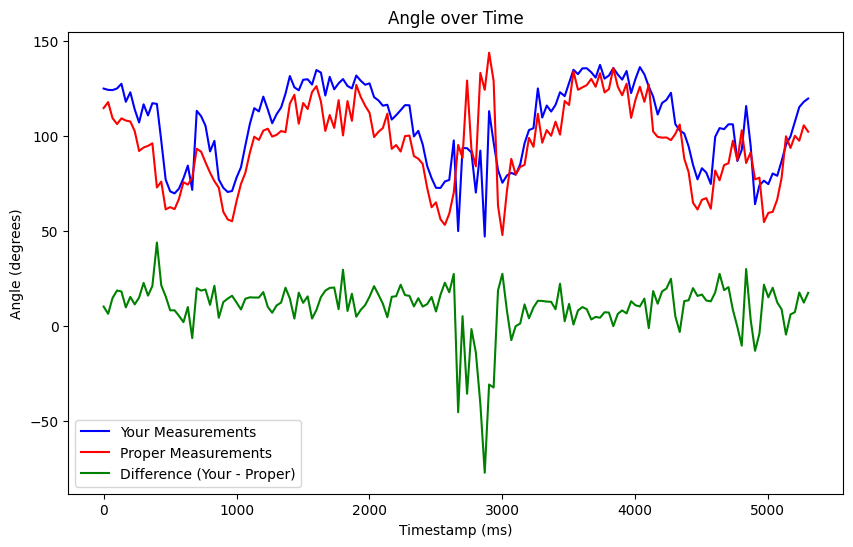

[-1, 33, 66, 100, 133, 166, 200, 233, 266, 300, 333, 366, 400, 433, 466, 500, 533, 566, 600, 633, 666, 700, 733, 766, 800, 833, 866, 900, 933, 966, 1000, 1033, 1066, 1100, 1133, 1168, 1201, 1235, 1268, 1301, 1335, 1368, 1401, 1435, 1468, 1501, 1535, 1568, 1601, 1635, 1668, 1701, 1735, 1768, 1801, 1835, 1868, 1901, 1935, 1968, 2001, 2035, 2068, 2101, 2135, 2168, 2201, 2235, 2268, 2301, 2335, 2368, 2401, 2435, 2468, 2501, 2535, 2568, 2601, 2635, 2668, 2701, 2735, 2768, 2801, 2835, 2868, 2901, 2935, 2968, 3001, 3035, 3068, 3101, 3135, 3168, 3201, 3235, 3268, 3301, 3335, 3368, 3401, 3435, 3470, 3503, 3536, 3570, 3603, 3636, 3670, 3703, 3736, 3770, 3803, 3836, 3870, 3903, 3936, 3970, 4003, 4036, 4070, 4103, 4136, 4170, 4203, 4236, 4270, 4303, 4336, 4370, 4403, 4436, 4470, 4503, 4536, 4570, 4603, 4636, 4670, 4703, 4736, 4770, 4803, 4836, 4870, 4903, 4936, 4970, 5003, 5036, 5070, 5103, 5136, 5170, 5203, 5236, 5270, 5303]
[125.01489466848547, 124.33019119344469, 124.21854028613473, 125.0628545

In [7]:
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = max(30, cap.get(cv2.CAP_PROP_FPS))
              
    while True: 
        ret, frame = cap.read()

        if not ret: 
            break

        timestamp_ms = int(cap.get(cv2.CAP_PROP_POS_MSEC))

        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame)        
        pose_landmarker_result = landmarker.detect_for_video(mp_image, timestamp_ms)

        if pose_landmarker_result.pose_landmarks is None or len(pose_landmarker_result.pose_landmarks) < 1:
            continue  # skip this frame

        point_A = pose_landmarker_result.pose_landmarks[0][15]
        point_B = pose_landmarker_result.pose_landmarks[0][13]
        point_C = pose_landmarker_result.pose_landmarks[0][11]

        angle = compute_angle(point_A, point_B, point_C)

        # Add the angles and timestamps for matplotlib
        angles.append(angle)
        timestamps.append(timestamp_ms)

        update_plot()

        cv2.imshow('Video', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

process_video('./data/SideViewGood.MOV')
print(timestamps)
print(angles)
